In [1]:
import sys

sys.path.append("/home/ptbadia/code/tfg/tfg_ttcross")

In [2]:
import numpy as np
import numba as nb
import matplotlib.pyplot as plt
from tt_cross.src.utils.functions import *
from tt_cross.src.regular_tt_cross.dmrg_cross import *
from tt_cross.src.quantic_tt_cross.interpolators_1D import *

In [3]:
# grid_creation
num_var = 10
subdivision = 30
temp = [np.linspace(0.5, 2, subdivision) for _ in range(num_var)]
grid = np.array(temp)
grid

array([[0.5       , 0.55172414, 0.60344828, 0.65517241, 0.70689655,
        0.75862069, 0.81034483, 0.86206897, 0.9137931 , 0.96551724,
        1.01724138, 1.06896552, 1.12068966, 1.17241379, 1.22413793,
        1.27586207, 1.32758621, 1.37931034, 1.43103448, 1.48275862,
        1.53448276, 1.5862069 , 1.63793103, 1.68965517, 1.74137931,
        1.79310345, 1.84482759, 1.89655172, 1.94827586, 2.        ],
       [0.5       , 0.55172414, 0.60344828, 0.65517241, 0.70689655,
        0.75862069, 0.81034483, 0.86206897, 0.9137931 , 0.96551724,
        1.01724138, 1.06896552, 1.12068966, 1.17241379, 1.22413793,
        1.27586207, 1.32758621, 1.37931034, 1.43103448, 1.48275862,
        1.53448276, 1.5862069 , 1.63793103, 1.68965517, 1.74137931,
        1.79310345, 1.84482759, 1.89655172, 1.94827586, 2.        ],
       [0.5       , 0.55172414, 0.60344828, 0.65517241, 0.70689655,
        0.75862069, 0.81034483, 0.86206897, 0.9137931 , 0.96551724,
        1.01724138, 1.06896552, 1.12068966, 1.

In [4]:
ttrc_interpolator = ttrc(
    func=slater,
    num_variables=num_var,
    grid=grid,
    maxvol_tol=1,
    truncation_tol=1e-10,
    sweeps=5,
    initial_bond_guess=10,
    max_bond=20,
)

Initialization done after time: 0.20523762702941895 seconds and 1 tries.


In [5]:
for i in ttrc_interpolator.i:
    print(i.shape)

(1, 1)
(10, 1)
(10, 2)
(10, 3)
(10, 4)
(10, 5)
(10, 6)
(10, 7)
(10, 8)
(10, 9)


In [6]:
for j in ttrc_interpolator.j:
    print(j.shape)

(10, 9)
(10, 8)
(10, 7)
(10, 6)
(10, 5)
(10, 4)
(10, 3)
(10, 2)
(10, 1)
(1, 1)


In [7]:
ttrc_interpolator.bonds

array([10, 10, 10, 10, 10, 10, 10, 10, 10])

In [8]:
for t in ttrc_interpolator.b:
    print(t.shape)

(1, 30, 10)
(10, 30, 10)
(10, 30, 10)
(10, 30, 10)
(10, 30, 10)
(10, 30, 10)
(10, 30, 10)
(10, 30, 10)
(10, 30, 10)
(10, 30, 1)


In [9]:
ttrc_interpolator.p[-1]

array([[1.]])

In [10]:
ttrc_interpolator.initial_sweep()

In [11]:
for i in range(1, num_var):
    a = ncon([ttrc_interpolator.b[i], ttrc_interpolator.b[i]], [[-1, 1, 2], [-2, 1, 2]])
    print(a)
    print("=============")

[[ 1.00000000e+00 -5.55111512e-17  3.64291930e-17  2.22044605e-16
   5.55111512e-17  1.73472348e-18  0.00000000e+00 -2.77555756e-17
  -9.36750677e-17 -2.08166817e-17]
 [-5.55111512e-17  1.00000000e+00 -1.11022302e-16  1.17961196e-16
  -2.42861287e-17 -9.02056208e-17  1.38777878e-17 -3.46944695e-18
   5.55111512e-17  3.90312782e-17]
 [ 3.64291930e-17 -1.11022302e-16  1.00000000e+00  5.55111512e-17
  -5.55111512e-17 -4.77048956e-17 -5.55111512e-17 -5.55111512e-17
  -1.04083409e-17 -1.38777878e-17]
 [ 2.22044605e-16  1.17961196e-16  5.55111512e-17  1.00000000e+00
   1.52655666e-16  7.97972799e-17  0.00000000e+00  1.04083409e-16
   1.38777878e-17 -1.21430643e-17]
 [ 5.55111512e-17 -2.42861287e-17 -5.55111512e-17  1.52655666e-16
   1.00000000e+00  1.11022302e-16 -4.16333634e-17  1.38777878e-16
   3.46944695e-17 -2.77555756e-17]
 [ 1.73472348e-18 -9.02056208e-17 -4.77048956e-17  7.97972799e-17
   1.11022302e-16  1.00000000e+00 -2.77555756e-17 -1.38777878e-16
  -4.16333634e-17 -1.38777878e-17

In [12]:
for site in range(num_var - 1):
    ttrc_interpolator.left_right_update(site)

In [13]:
for p in ttrc_interpolator.p:
    print(p.shape)

(1, 1)
(8, 8)
(9, 9)
(9, 9)
(9, 9)
(10, 10)
(9, 9)
(10, 10)
(9, 9)
(7, 7)
(1, 1)


In [14]:
for b in ttrc_interpolator.b:
    print(b.shape)

(1, 30, 8)
(8, 30, 9)
(9, 30, 9)
(9, 30, 9)
(9, 30, 10)
(10, 30, 9)
(9, 30, 10)
(10, 30, 9)
(9, 30, 7)
(7, 30, 1)


In [15]:
for site in range(num_var - 2, -1, -1):
    ttrc_interpolator.right_left_update(site)

In [16]:
for p in ttrc_interpolator.p:
    print(p.shape)

(1, 1)
(7, 7)
(8, 8)
(9, 9)
(9, 9)
(9, 9)
(10, 10)
(9, 9)
(9, 9)
(7, 7)
(1, 1)


In [17]:
ttrc_interpolator.bonds

array([ 7,  8,  9,  9,  9, 10,  9,  9,  7])

In [18]:
ttrc_interpolator = ttrc(
    func=slater,
    num_variables=num_var,
    grid=grid,
    maxvol_tol=1.005,
    truncation_tol=1e-12,
    sweeps=10,
    initial_bond_guess=3,
    max_bond=10,
)

mps_ttrc = ttrc_interpolator.run()

Initialization done after time: 0.02550482749938965 seconds and 1 tries.
Sweep 1
Sweep 2
Sweep 3
Sweep 4
Sweep 5
Sweep 6
Sweep 7
Sweep 8
Sweep 9
Sweep 10


In [19]:
print("Time spent to do the whole computation =", ttrc_interpolator.total_time, "s")
print("Time spent building superblock tensors =", ttrc_interpolator.super_block_time, "s")

Time spent to do the whole computation = 130.54757809638977 s
Time spent building superblock tensors = 117.06641244888306 s


In [25]:
for site in range(num_var - 1):
    print(ttrc_interpolator.i[site + 1].shape)
    print(ttrc_interpolator.j[site].shape)
    print("==========")

(9, 1)
(9, 9)
(10, 2)
(10, 8)
(10, 3)
(10, 7)
(10, 4)
(10, 6)
(10, 5)
(10, 5)
(10, 6)
(10, 4)
(10, 7)
(10, 3)
(10, 8)
(10, 2)
(8, 9)
(8, 1)


In [26]:
for t in mps_ttrc:
    print(t.shape)

(1, 30, 9)
(9, 9)
(9, 30, 10)
(10, 10)
(10, 30, 10)
(10, 10)
(10, 30, 10)
(10, 10)
(10, 30, 10)
(10, 10)
(10, 30, 10)
(10, 10)
(10, 30, 10)
(10, 10)
(10, 30, 10)
(10, 10)
(10, 30, 8)
(8, 8)
(8, 30, 1)


# 1-D Interpolator

In [3]:
def custom_func(x):
    B = 2 ** (-30)
    return np.cos(x / B) * np.cos(x / (4 * np.sqrt(5) * B)) * np.exp(-(x**2)) + 2 * np.exp(-x)

In [4]:
interval = [0, 2 ** (-23)]
d = 15

In [5]:
test_interpolator = ttrc_one_dim_func_interpolator(
    func=custom_func,
    interval=interval,
    d=15,
    complex_function=False,
)

In [7]:
test_interpolator.interpolate(
    initial_bond_guess=5,
    max_bond=10,
    maxvol_tol=1.0001,
    truncation_tol=1e-10,
    sweeps=10,
)

Initialization done after time: 0.005637407302856445 seconds and 1 tries.
Sweep 1
Sweep 2
Sweep 3
Sweep 4
Sweep 5
Sweep 6
Sweep 7
Sweep 8
Sweep 9
Sweep 10


In [8]:
for i in test_interpolator.interpolator.i:
    print(i.shape)

(1, 1)
(2, 1)
(4, 2)
(5, 3)
(5, 4)
(5, 5)
(5, 6)
(5, 7)
(5, 8)
(5, 9)
(5, 10)
(4, 11)
(4, 12)
(4, 13)
(2, 14)


In [9]:
for j in test_interpolator.interpolator.j:
    print(j.shape)

(2, 14)
(4, 13)
(5, 12)
(5, 11)
(5, 10)
(5, 9)
(5, 8)
(5, 7)
(5, 6)
(5, 5)
(4, 4)
(4, 3)
(4, 2)
(2, 1)
(1, 1)


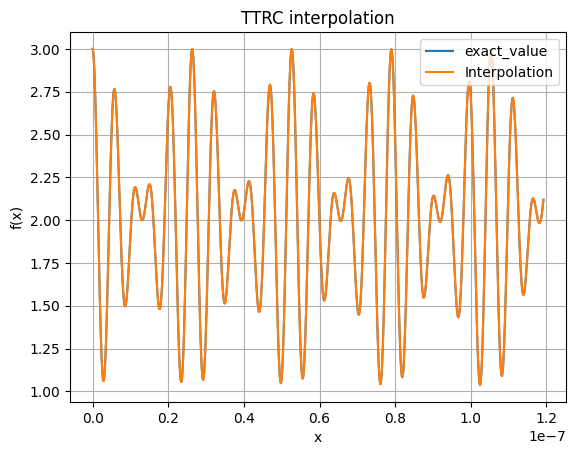

In [10]:
import matplotlib.pyplot as plt

x = np.linspace(0, 2 ** (-23), 1000)
y = custom_func(x)
interpolation = np.array([test_interpolator.eval(x_i) for x_i in x])

plt.plot(x, y, label="exact_value")
plt.plot(x, interpolation, label="Interpolation")

plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("TTRC interpolation")
plt.legend()
plt.grid(True)
plt.show()

In [11]:
for i in range(test_interpolator.d - 1):
    print(np.concatenate((test_interpolator.interpolator.i[i + 1], test_interpolator.interpolator.j[i]), axis=1))
    print("==============================")

[[0.0 0.0 0.0 1.0 1.0 1.0 1.0 1.0 0.0 0.0 0.0 1.0 1.0 1.0 0.0]
 [1.0 0.0 1.0 1.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 1.0 1.0 1.0 0.0]]
[[0.0 1.0 0.0 1.0 1.0 1.0 1.0 1.0 0.0 0.0 0.0 1.0 1.0 1.0 0.0]
 [0.0 0.0 1.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 1.0 0.0]
 [1.0 0.0 1.0 1.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 1.0 1.0 1.0 0.0]
 [1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 1.0 0.0]]
[[0.0 1.0 1.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 1.0 1.0 0.0]
 [1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 1.0 0.0]
 [0.0 0.0 1.0 1.0 1.0 1.0 1.0 1.0 0.0 0.0 0.0 1.0 1.0 1.0 0.0]
 [1.0 0.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 1.0 0.0]
 [0.0 0.0 0.0 1.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 1.0 1.0 1.0 0.0]]
[[0.0 1.0 1.0 1.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 1.0 1.0 1.0 0.0]
 [1.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 1.0 1.0 0.0]
 [0.0 1.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 1.0 0.0]
 [0.0 0.0 0.0 1.0 1.0 1.0 1.0 1.0 0.0 0.0 0.0 1.0 1.0 1.0 0.0]
 [1.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 1.